# Urban-Rural Gradient in _K_ with migration, selection

In these simulations, we imposed a gradient in carrying capacity across the matrix, with urba population being the largest and rural the smallest. All populations were initialized at carrying capacity. These simulations sought to test the balance between drift and selection in forming clines. We performed simulations under 3 migration rates: 0, 0.01, 0.05. Simulations included 10 selection coefficients: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2 The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 30): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: NA
* Bottleneck proportion: NA
* pA and pB: 0.5 and 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (urban): 1000
* Minimum _K_ (rural): 10
* Maximum selection coefficient: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary_U-R_Selection')

# Dataset for mean slope and proportions by parameter combination
MeansProps <- fread('20171225_MeansProps_allFill_U-R_Selection.csv', header = T)
MeansProps$max_s = as.factor(as.character(MeansProps$max_s))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
# MeansProps$prop_sigPos[MeansProps$prop_sigPos == 1.000] <- 0.0

# Dataset with output from each regression
# RegSummary <- fread('20171221_RegSummary_allFill_Selection.csv')

In [3]:
#Data subsets
MeansProps_Gen250 <- subset(MeansProps, seq == "250")
MeansProps_NoMig <- subset(MeansProps, Mig_rate == "0")
MeansProps_NoMig_Gen250 <- subset(MeansProps, seq == "250" & Mig_rate == "0")

# MeansProps_NoMig_Gen250_SigOnly <- RegSummary %>%
#     filter(Generation == 250 & p.value < 0.05) %>% 
#     group_by(Mig_rate, max_s) %>%
#     summarize(mean_SigSlope = mean(estimate), 
#               sd_SigSlope = sd(estimate),
#               n = length(estimate),
#               se_SigSlope = sd_SigSlope / sqrt(n), 
#               ci_SigSlope = 1.96 * se_SigSlope)

In [4]:
MeansProps_Gen250

Mig_rate,max_s,seq,mean,sd,n,se,ci_mean,prop_sigPos,prop_pos,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
0,0,250,-6.075843e-03,0.004428049,1000,1.400272e-04,0.0002744533,0.001,0.093,0.0091842800,0.018001189,0.0009994999,0.001959020,0.263,0.907,0.0091842800,0.018001189,0.013922320,0.027287748
0,0.001,250,-5.024256e-03,0.004913618,1000,1.553823e-04,0.0003045492,0.001,0.164,0.0117091417,0.022949918,0.0009994999,0.001959020,0.223,0.836,0.0117091417,0.022949918,0.013163244,0.025799959
0,0.0025,250,-3.466031e-03,0.004786840,1000,1.513732e-04,0.0002966914,0.005,0.224,0.0131842330,0.025841097,0.0022304708,0.004371723,0.138,0.776,0.0131842330,0.025841097,0.010906695,0.021377123
0,0.005,250,-7.140489e-04,0.005063058,1000,1.601080e-04,0.0003138116,0.025,0.444,0.0157119063,0.030795336,0.0049371044,0.009676725,0.050,0.556,0.0157119063,0.030795336,0.006892024,0.013508368
0,0.0075,250,1.860338e-03,0.004825282,1000,1.525888e-04,0.0002990741,0.065,0.644,0.0151414662,0.029677274,0.0077958322,0.015279831,0.014,0.356,0.0151414662,0.029677274,0.003715373,0.007282132
0,0.01,250,4.635327e-03,0.004641506,1000,1.467773e-04,0.0002876835,0.150,0.834,0.0117662228,0.023061797,0.0112915898,0.022131516,0.002,0.166,0.0117662228,0.023061797,0.001412799,0.002769085
0,0.025,250,1.545563e-02,0.004535488,1000,1.434247e-04,0.0002811124,0.906,1.000,0.0000000000,0.000000000,0.0092284343,0.018087731,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.05,250,2.469344e-02,0.003845703,1000,1.216118e-04,0.0002383592,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.1,250,3.192126e-02,0.003005447,1000,9.504059e-05,0.0001862796,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.2,250,3.497010e-02,0.002032192,1000,6.426356e-05,0.0001259566,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000


In [4]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

# Mean slope by selection and migration rate

In [17]:
MeansProps_Gen250

Mig_rate,max_s,seq,mean,sd,n,se,ci_mean,prop_sigPos,prop_pos,se_pos,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg
0,0,250,-6.075843e-03,0.004428049,1000,1.400272e-04,0.0002744533,0.001,0.093,0.0091842800,0.018001189,0.0009994999,0.001959020,0.263,0.907,0.0091842800,0.018001189,0.013922320,0.027287748
0,0.001,250,-5.024256e-03,0.004913618,1000,1.553823e-04,0.0003045492,0.001,0.164,0.0117091417,0.022949918,0.0009994999,0.001959020,0.223,0.836,0.0117091417,0.022949918,0.013163244,0.025799959
0,0.0025,250,-3.466031e-03,0.004786840,1000,1.513732e-04,0.0002966914,0.005,0.224,0.0131842330,0.025841097,0.0022304708,0.004371723,0.138,0.776,0.0131842330,0.025841097,0.010906695,0.021377123
0,0.005,250,-7.140489e-04,0.005063058,1000,1.601080e-04,0.0003138116,0.025,0.444,0.0157119063,0.030795336,0.0049371044,0.009676725,0.050,0.556,0.0157119063,0.030795336,0.006892024,0.013508368
0,0.0075,250,1.860338e-03,0.004825282,1000,1.525888e-04,0.0002990741,0.065,0.644,0.0151414662,0.029677274,0.0077958322,0.015279831,0.014,0.356,0.0151414662,0.029677274,0.003715373,0.007282132
0,0.01,250,4.635327e-03,0.004641506,1000,1.467773e-04,0.0002876835,0.150,0.834,0.0117662228,0.023061797,0.0112915898,0.022131516,0.002,0.166,0.0117662228,0.023061797,0.001412799,0.002769085
0,0.025,250,1.545563e-02,0.004535488,1000,1.434247e-04,0.0002811124,0.906,1.000,0.0000000000,0.000000000,0.0092284343,0.018087731,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.05,250,2.469344e-02,0.003845703,1000,1.216118e-04,0.0002383592,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.1,250,3.192126e-02,0.003005447,1000,9.504059e-05,0.0001862796,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000
0,0.2,250,3.497010e-02,0.002032192,1000,6.426356e-05,0.0001259566,1.000,1.000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000,0.000,0.0000000000,0.000000000,0.000000000,0.000000000


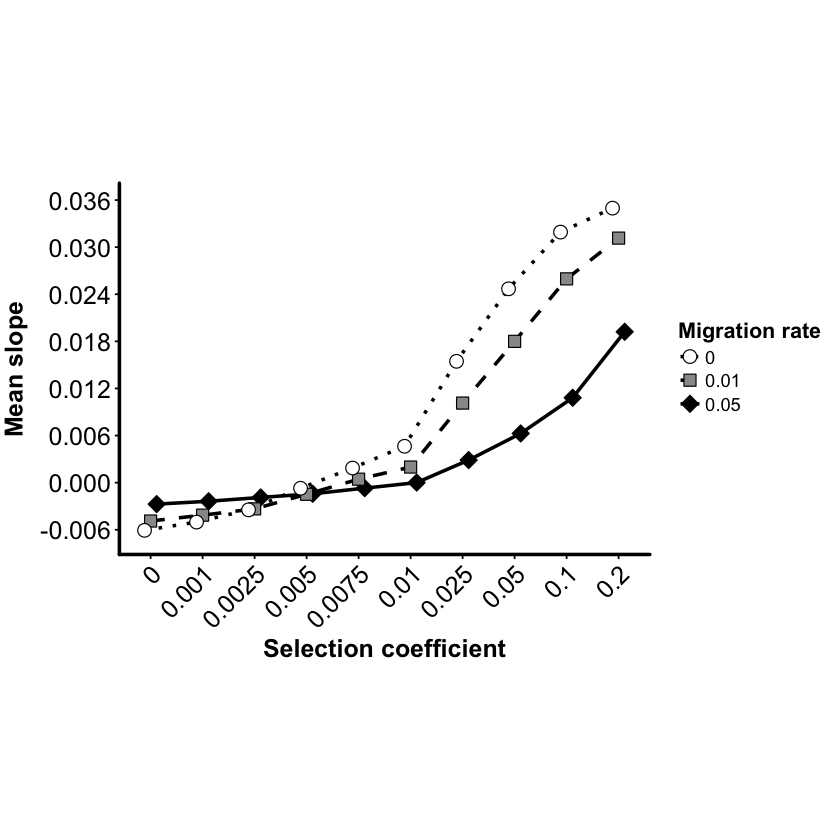

In [5]:
MeanSlope_UR_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = mean, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Selection coefficient") + 
    coord_cartesian(ylim = c(-0.007, 0.036)) + scale_y_continuous(breaks = seq(from = -0.006, to = 0.036, by = 0.006)) + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_UR_Sel_Mig

## Effects of selection, migration on proportion of negative and positive clines

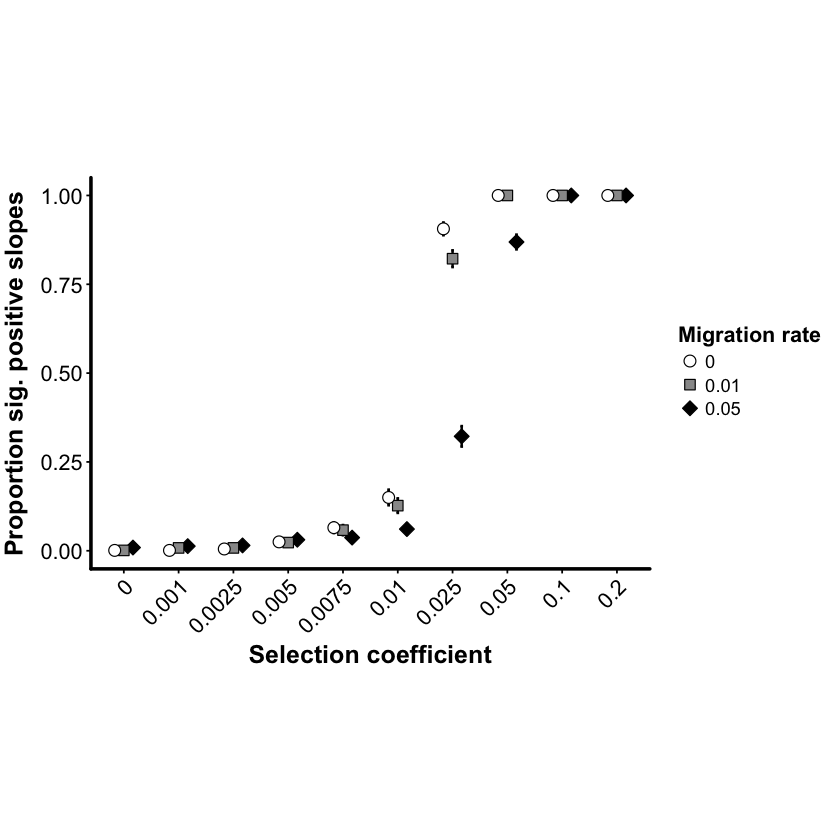

In [12]:
PropSigPos_UR_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = prop_sigPos, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Proportion sig. positive slopes") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
PropSigPos_UR_Sel_Mig

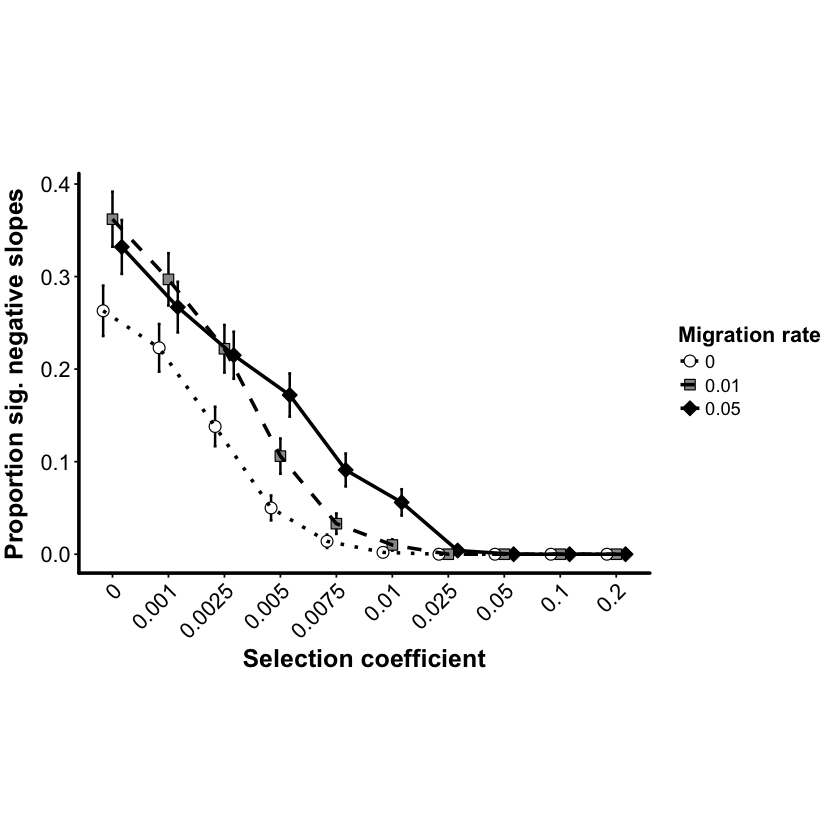

In [9]:
PropSigNeg_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = prop_sigNeg, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = prop_sigNeg - ci_sigNeg, ymax = prop_sigNeg + ci_sigNeg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Proportion sig. negative slopes") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
PropSigNeg_Sel_Mig

In [8]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
MeansProps_melt <- dplyr::select(MeansProps_NoMig_Gen250, max_s, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_melt[,c("max_s", "prop_sigPos", "ci_sigPos")], 
            id=c("max_s", "ci_sigPos"))
dm2 <- melt(MeansProps_melt[,c("max_s", "prop_sigNeg", "ci_sigNeg")], 
            id=c("max_s", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
MeansProps_melt <- rbind(dm1, dm2)
MeansProps_melt

max_s,ci,variable,value
0,0.001959020,prop_sigPos,0.001
0.001,0.001959020,prop_sigPos,0.001
0.0025,0.004371723,prop_sigPos,0.005
0.005,0.009676725,prop_sigPos,0.025
0.0075,0.015279831,prop_sigPos,0.065
0.01,0.022131516,prop_sigPos,0.150
0.025,0.018087731,prop_sigPos,0.906
0.05,0.000000000,prop_sigPos,1.000
0.1,0.000000000,prop_sigPos,1.000
0.2,0.000000000,prop_sigPos,1.000


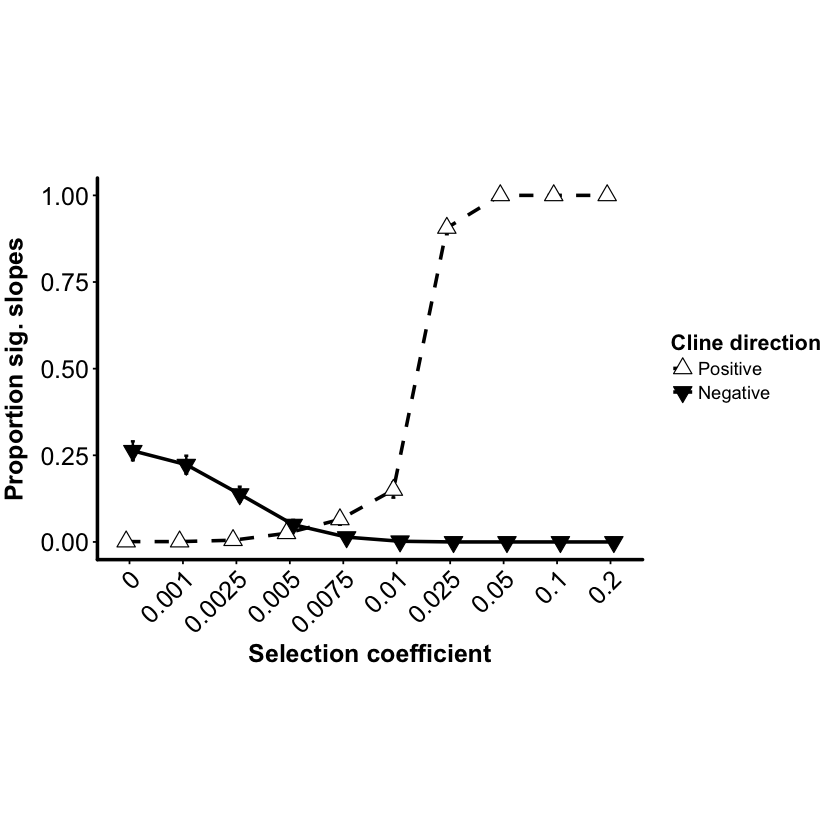

In [9]:
#Plot proportion of significant slopes by migration rate
PropSig_UR_Sel_Dir <- ggplot(MeansProps_melt, aes(x = max_s, y = value, 
    shape = variable, fill = variable, group = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + 
    geom_line(size = 1, aes(linetype = variable), position = position_dodge(width = 0.25)) + 
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_linetype_manual(labels = c("Positive", "Negative"), values = c("dashed", "solid")) +
    labs(shape = 'Cline direction', fill = 'Cline direction', linetype = 'Cline direction') + ng1.45
PropSig_UR_Sel_Dir

In [10]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/figures"

MeanSlope_UR_Sel_Mig_NoLeg = MeanSlope_UR_Sel_Mig + theme(legend.position="none")
# PropSigPos_UR_Sel_Mig_NoLeg = PropSigPos_UR_Sel_Mig + theme(legend.position="none")
PropSig_UR_Sel_Dir_NoLeg = PropSig_UR_Sel_Dir + theme(legend.position="none")

ggsave("Figure-7B_MeanSlope_UR_Sel_Mig_NoLeg.pdf", plot = MeanSlope_UR_Sel_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("PropSigPos_UR_Sel_Mig_NoLeg.pdf", plot = PropSigPos_UR_Sel_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-7D_PropSig_UR_Sel_Dir_NoLeg.pdf", plot = PropSig_UR_Sel_Dir_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
